# Detector de plagio 
### (Clasificador con coseno del ángulo)

En este trabajo se busca realizar un detector de plagio de código utilizando técnicas del Deep Learning


**Autores:**

*   Michelle Aylin Calzada Montes
*   Manolo Ramírez Pintor
*   Eduardo Rodríguez Gill

### Cada vez que se quiera trabajar, se tiene que correr esta celda para tener acceso a los archivos

In [ ]:
# Accesar a Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ir al directorio de los archivos
%cd "/content/drive/Shareddrives/AI/Reto"
!ls

Mounted at /content/drive
/content/drive/Shareddrives/AI/Reto
 Approach3_Mich.ipynb		   Reto.ipynb
'Approach4 (no modificar).ipynb'   version_2_tokenized_dicc.zip
'Approach5_(no_modificar).ipynb'   version_2_tokenized.zip
 Plagios_IA.zip


In [ ]:
# Eliminar todo por si queremos reiniciar
!rm -rf "/content/Plagios IA"

# Copiar zip de las carpetas al almacenamiento de colab
!cp -r /content/drive/Shareddrives/AI/Reto/Plagios_IA.zip /content

# Nuevo - Copiar zip del codigo tokenizado al almacenamiento de colab
!cp -r /content/drive/Shareddrives/AI/Reto/version_2_tokenized_dicc.zip /content

In [ ]:
# Extraer zip de Plagios IA
%%capture
%cd /content
!unzip Plagios_IA.zip
!unzip version_2_tokenized_dicc.zip

In [ ]:
# Eliminar archivos distractores
!rm -rf sample_data
!rm Plagios_IA.zip

# **Ya no correr las siguientes celdas**
## Revisando la info que contiene conplag en sus tablas



In [ ]:
# Ver info de conplag
import pandas as pd
df_conplag_labels = pd.read_csv("./Plagios IA/conplag/versions/labels.csv")
df_conplag_test = pd.read_csv("./Plagios IA/conplag/versions/test_pairs.csv")
df_conplag_train = pd.read_csv("./Plagios IA/conplag/versions/train_pairs.csv")

In [ ]:
# Head de labels conplag
df_conplag_labels

,sub1,sub2,problem,verdict
0,0fd5b95a,6490bbe8,19,0
1,464a03b8,ff1fc018,20,0
2,3e6def38,548ffb07,14,1
3,0b91922c,71a4f6d2,6,0
4,9291ca83,d6fb3b9e,15,0
...,...,...,...,...
906,11c2ab99,28c2d81a,8,1
907,550335a3,6d7d5dd7,4,0
908,558df7d4,d8654140,17,0
909,3088ca9c,6f393cfe,15,1


In [ ]:
# Quitar archivos si no lo hicimos bien
!rm -rf "Plagios IA/conplag/versions/version_2_tokenized"

## Este bloque de código toma todos los archivos de conplag y los tokeniza
* Los tokens se convierten a valores numéricos únicos con una función hash de 32 bits

In [ ]:
# Instalar code_tokenize
%%capture
!pip install code-tokenize

In [ ]:
# Tokenización de código:
import code_tokenize as ctok
import os

path = "./Plagios IA/conplag/versions/version_2"
new_path = "./Plagios IA/conplag/versions/version_2_tokenized"
folders = [x[0] for x in os.walk(path)]
todos_los_archivos = []

for folder in folders:
    files = os.listdir(folder)
    new_folder = folder.replace(path, new_path) # replace the original path with the new one
    if not os.path.exists(new_folder): # check if the folder exists
        os.mkdir(new_folder) # create the folder only if it doesn't exist
        for file in files:
            file_path = os.path.join(folder, file)
            if os.path.isdir(file_path): # check if the file is actually a subfolder
                subfiles = os.listdir(file_path) # get the files in the subfolder
                new_subfolder = os.path.join(new_folder, file) # create a new subfolder with the same name
                os.mkdir(new_subfolder)
                for subfile in subfiles: # loop over the files in the subfolder
                    subfile_path = os.path.join(file_path, subfile)
                    todos_los_archivos.append(subfile_path)
            else: # if the file is not a subfolder, proceed as before
                with open(file_path, "r") as f:
                    content = f.read()
                todos_los_archivos.append(subfile_path)

len(todos_los_archivos)

1822

In [ ]:
# Quitar carpetas
!rm -rf "Plagios IA/conplag/versions/version_2_tokenized"

In [ ]:
# Instalar tokenizers para hacer un diccionario
%%capture
!pip install tokenizers

In [ ]:
# Crear directorio para el diccionario
!mkdir mi_tokenizer

In [ ]:
# Importar libreria del diccionario
from tokenizers import CharBPETokenizer

# Crear un tokenizer vacío
tokenizer = CharBPETokenizer()
# Entrenar el tokenizer con un conjunto de archivos de código (por ejemplo, en C++)
tokenizer.train(files=todos_los_archivos, vocab_size=0)
# Guardar el tokenizer y su vocabulario
tokenizer.save_model("./mi_tokenizer")

# Cargar el tokenizer desde el disco a una variable
tokenizer = CharBPETokenizer("mi_tokenizer/vocab.json", "mi_tokenizer/merges.txt")

# Probar con algún código de Java
#tokens = tokenizer.encode("""    static class Pair implements Comparable<Pair> {
#        int id;
#        long sum=0;
#        public Pair(int id) {
#            this.id=id;
#        }""")
#print(tokens.ids) # [1, 2, 3, 4]
# print(tokens.tokens) # ["print", "(", "\"Hola\"", ")"]


In [ ]:
# Tokenizar un nuevo archivo de código

# Tokenización de código:
import code_tokenize as ctok
import os

path = "./Plagios IA/conplag/versions/version_2"
new_path = "./Plagios IA/conplag/versions/version_2_tokenized"
folders = [x[0] for x in os.walk(path)]
todos_los_archivos = []

for folder in folders:
    files = os.listdir(folder)
    new_folder = folder.replace(path, new_path) # replace the original path with the new one
    if not os.path.exists(new_folder): # check if the folder exists
        os.mkdir(new_folder) # create the folder only if it doesn't exist
        for file in files:
            file_path = os.path.join(folder, file)
            if os.path.isdir(file_path): # check if the file is actually a subfolder
                subfiles = os.listdir(file_path) # get the files in the subfolder
                new_subfolder = os.path.join(new_folder, file) # create a new subfolder with the same name
                os.mkdir(new_subfolder)
                for subfile in subfiles: # loop over the files in the subfolder
                    subfile_path = os.path.join(file_path, subfile)
                    todos_los_archivos.append(subfile_path)
                    with open(subfile_path, "r") as f:
                        content = f.read()
                    tokens = tokenizer.encode(content)
                    tokens_finales = str(tokens.ids).strip("[]")
                    new_subfile_path = os.path.join(new_subfolder, subfile[:-4] + "tok")
                    with open(new_subfile_path, "w") as f:
                        f.write("".join(tokens_finales))
            else: # if the file is not a subfolder, proceed as before
                with open(file_path, "r") as f:
                    content = f.read()
                #print(file_path)
                tokens = tokenizer.encode(content)
                new_file_path = os.path.join(new_folder, file[:-4] + "tok")
                todos_los_archivos.append(subfile_path)
                tokens_finales = str(tokens.ids).strip("[]")
                with open(new_file_path, "w") as f:
                    f.write("".join(tokens_finales))

## Estos (4) bloques de código almacena el código tokenizado a un zip y lo copia a Google Drive

In [ ]:
# Nos dirigimos a la carpeta para almacenaje
%cd "/content/Plagios IA/conplag/versions/"

/content/Plagios IA/conplag/versions


In [ ]:
# Lo zippeamos
%%capture
!zip -r /content/version_2_tokenized_dicc.zip "version_2_tokenized"

In [ ]:
# Nos regresamos a nuestra raiz para evitar accidentes
%cd /content

/content


In [ ]:
!cp version_2_tokenized_dicc.zip /content/drive/Shareddrives/AI/Reto # Copy to GDrive

In [ ]:
%%capture
!rm -rf version_2_tokenized

### Método de verificación (por si acaso)
Valida que el número de carpetas y de archivos sea el mismo entre la carpeta original y la carpeta tokenizada.

In [ ]:
# Verificar que todo está correcto en carpetas y archivos
import os

path1 = "./Plagios IA/conplag/versions/version_2"
path2 = "./Plagios IA/conplag/versions/version_2_tokenized"

folder_count1 = 0
file_count1 = 0
folder_count2 = 0
file_count2 = 0

for folder, subfolders, files in os.walk(path1):
    folder_count1 += 1 # increment the folder count
    file_count1 += len(files) # add the number of files in the folder

for folder, subfolders, files in os.walk(path2):
    folder_count2 += 1 # increment the folder count
    file_count2 += len(files) # add the number of files in the folder

print(f"Number of folders in {path1}: {folder_count1}")
print(f"Number of files in {path1}: {file_count1}")
print(f"Number of folders in {path2}: {folder_count2}")
print(f"Number of files in {path2}: {file_count2}")

Number of folders in ./Plagios IA/conplag/versions/version_2: 912
Number of files in ./Plagios IA/conplag/versions/version_2: 1822
Number of folders in ./Plagios IA/conplag/versions/version_2_tokenized: 0
Number of files in ./Plagios IA/conplag/versions/version_2_tokenized: 0


# **Continuar ejecución de celdas a partir de aquí:**
## Creación de un dataframe para iniciar el entrenamiento

In [ ]:
# Retomar los paths de trabajo 
import os
path = "./Plagios IA/conplag/versions/version_2"
new_path = "./version_2_tokenized"

In [ ]:
import pandas as pd

# Lee el dataframe
df_conplag_labels = pd.read_csv("./Plagios IA/conplag/versions/labels.csv")

# Separa los valores de verdict que sean 0 y 1 en dataframes separados
df_verdict_0 = df_conplag_labels[df_conplag_labels['verdict'] == 0]
df_verdict_1 = df_conplag_labels[df_conplag_labels['verdict'] == 1]

# Selecciona aleatoriamente 251 filas de cada dataframe sin reemplazo
df_verdict_0_sampled = df_verdict_0.sample(n=251, replace=False)
df_verdict_1_sampled = df_verdict_1.sample(n=251, replace=False)

# Concatena los dos dataframes resultantes en uno solo
df_balanced = pd.concat([df_verdict_0_sampled, df_verdict_1_sampled])

print(df_balanced)

# Contar el número de 1s y 0s en la columna veredicto
conteo = df_balanced['verdict'].value_counts()
print(conteo)


         sub1      sub2  problem  verdict
470  a7e7f371  f8e7b886       21        0
735  28820c82  8637bb90       18        0
250  83b44c9c  8d9871a9       18        0
381  5d175166  d1391025        3        0
849  12309af3  390d2f23       17        0
..        ...       ...      ...      ...
662  1c8bb204  4b7646f4       18        1
364  51cc7026  e81b2d16       16        1
266  0df4050e  6f02c6d9       20        1
595  a3ebea91  f80f6d8d        6        1
560  1b372750  fdd41565       15        1

[502 rows x 4 columns]
0    251
1    251
Name: verdict, dtype: int64


In [ ]:
# create a dictionary that maps each pair of files to their verdict
verdict_dict = {}
for index, row in df_balanced.iterrows():
    sub1 = row["sub1"]
    sub2 = row["sub2"]
    verdict = row["verdict"]
    verdict_dict[f"{sub1}_{sub2}"] = verdict

print(verdict_dict)

{'a7e7f371_f8e7b886': 0, '28820c82_8637bb90': 0, '83b44c9c_8d9871a9': 0, '5d175166_d1391025': 0, '12309af3_390d2f23': 0, '5756162d_808f7516': 0, '3bd7275e_8635bc10': 0, 'c9159d9c_f0ede32a': 0, 'a5d5a95f_c4ca2ff3': 0, '1dab88fb_7b5f64b7': 0, '00af3420_d92c5342': 0, '1097b326_b45d28b2': 0, '24afd00e_279e274a': 0, '169e34bf_609af028': 0, '3a318b43_90b71536': 0, 'ca3128ab_e270e909': 0, '18d20d2e_d8a171a3': 0, '11373c16_7011024d': 0, 'b08b1c3c_d92b4600': 0, 'a3e272af_f7fc2e94': 0, '6f393cfe_b185d034': 0, '3380fa52_e1a5831a': 0, '7011024d_e6b7a899': 0, '8703709f_d2901569': 0, '2fdcf0ad_d20e861b': 0, 'a3e272af_d1cd194e': 0, '3d88acb8_b6023b26': 0, '29210e56_46e9aed4': 0, '11373c16_69b2fd22': 0, 'a368f345_b434c275': 0, '67241a76_8a39dbf5': 0, 'ba468e1f_d9199dfd': 0, '67996c4c_9028caf7': 0, '4138b081_f729338f': 0, '5a81e159_866a2d52': 0, '4da08761_6f393cfe': 0, 'c34bb733_ea899386': 0, '3a12e509_52cd85f2': 0, '13441e8f_2ebeae13': 0, '44428e63_c850e422': 0, '2db37cb1_875ed4c8': 0, '7c220622_a0663

In [ ]:
import numpy as np
# create empty lists to store the inputs and targets
inputs = []
targets = []
lenght = 0
for subfolder in os.listdir(new_path):
    if subfolder in verdict_dict:
      verdict = verdict_dict[subfolder]
    else:
      continue
    file1 = len(np.loadtxt(os.path.join(new_path, subfolder, subfolder[:8] + ".tok"), dtype=int, delimiter=","))
    file2 = len(np.loadtxt(os.path.join(new_path, subfolder, subfolder[9:] + ".tok"), dtype=int, delimiter=","))
    if file1 > lenght:
      lenght = file1
    if file2 > lenght:
      lenght = file2

lenght

3934

In [ ]:
import numpy as np
# create empty lists to store the inputs and targets
inputs = []
targets = []
# loop over the subfolders in the tokenized folder
for subfolder in os.listdir(new_path):
    # get the verdict from the dictionary
    if subfolder in verdict_dict:
      verdict = verdict_dict[subfolder]
      #print(verdict)
    else:
      continue
      #print("La clave no existe en el diccionario.")
    # load the two files and pad them with zeros
    #print(new_path)
    #print(subfolder)
    file1 = np.loadtxt(os.path.join(new_path, subfolder, subfolder[:8] + ".tok"), dtype=int, delimiter=",")
    pad_width1 = lenght - len(file1)
    file1 = np.pad(file1, (0, pad_width1), mode='constant')
    file2 = np.loadtxt(os.path.join(new_path, subfolder, subfolder[9:] + ".tok"), dtype=int, delimiter=",")
    pad_width2 = lenght - len(file2)
    file2 = np.pad(file2, (0, pad_width2), mode='constant')
    # stack the arrays horizontally
    input = file1, file2
    # append the input and target to the lists
    inputs.append(input)
    targets.append(verdict)
# convert the lists to arrays
inputs = np.array(inputs)
targets = np.array(targets)

inputs.shape

(502, 2, 3934)

In [ ]:
inputs

array([[[72, 76, 79, ...,  0,  0,  0],
        [72, 76, 79, ...,  0,  0,  0]],

       [[72, 76, 79, ...,  0,  0,  0],
        [72, 76, 79, ...,  0,  0,  0]],

       [[72, 76, 79, ...,  0,  0,  0],
        [72, 76, 79, ...,  0,  0,  0]],

       ...,

       [[72, 76, 79, ...,  0,  0,  0],
        [72, 76, 79, ...,  0,  0,  0]],

       [[72, 76, 79, ...,  0,  0,  0],
        [72, 76, 79, ...,  0,  0,  0]],

       [[72, 76, 79, ...,  0,  0,  0],
        [72, 76, 79, ...,  0,  0,  0]]])

In [ ]:
# Dividir la columna de program por 305
inputs = inputs 
print(inputs[1])

[[72 76 79 ...  0  0  0]
 [72 76 79 ...  0  0  0]]


In [ ]:
cos_ang = []

#print(inputs[0][0])


print("Predicción \t Veredicto")

for i in range(len(inputs)):
  A = np.array(inputs[i][0])
  B = np.array(inputs[i][1])

  # Calcular el producto escalar
  dot_product = np.dot(A, B)

  # Calcular las normas de los vectores
  norm_A = np.linalg.norm(A)
  norm_B = np.linalg.norm(B)

  # Calcular el coseno del ángulo
  cos_angle = dot_product / (norm_A * norm_B)

  # Calcular el ángulo en radianes
  angle_rad = np.arccos(cos_angle)

  # Convertir el ángulo a grados
  angle_deg = np.degrees(angle_rad)

  

  print(angle_deg, targets[i])
  cos_ang.append(angle_deg/100)


cos_ang = np.array(cos_ang)   

Predicción 	 Veredicto
42.11323655504453 1
66.151177116222 0
50.50564540574933 0
58.0759835532789 1
59.172096022121394 0
33.661317134017835 1
42.35227749753709 1
59.01853321945645 0
61.54164238686728 0
41.762745443610406 0
46.62777288785249 0
51.55422463312273 0
0.0 1
45.64453665990246 1
56.05037934137224 0
43.73580588720757 0
42.95742286671006 0
1.2074182697257333e-06 1
48.28705847066257 0
45.014437940008776 0
45.759024671483175 0
0.0 1
2.077526719810097 1
56.03191467236127 1
50.24477925799052 0
51.10511531555111 1
42.7307321681747 0
40.02925654253016 1
48.545670732901044 1
57.94086252340076 0
46.36554122898142 1
49.1937219459452 0
46.98030793708786 0
45.75015646672657 1
57.43888004243021 1
47.28656926261517 1
59.947654055794395 0
52.86587776747661 0
62.822041202188664 0
57.98979228141929 1
0.0 1
44.758857407118896 1
39.93728487255446 0
44.971035071432965 0
42.344093084930876 1
1.2074182697257333e-06 1
49.5960657481728 0
46.60474682516057 0
45.67810304362389 1
44.233833722128395 0
50.

<ipython-input-52-af01189e72ba>:23: RuntimeWarning: invalid value encountered in arccos
  angle_rad = np.arccos(cos_angle)


 0
46.24636554116376 0
57.08559885660127 0
50.604561473257625 0
47.85702060590357 1
48.16421800045297 0
46.01811801956621 0
41.66144565982738 1
1.2074182697257333e-06 1
64.04110675500921 0
44.1727960473205 1
40.56165839273805 1
39.287332618381406 1
0.0 1
48.56210912847231 1
57.4570781565542 0
50.39787455225431 1
43.30492290054105 0
53.20676461265603 0
49.95857903885504 1
61.68353926701248 0
42.976557337584175 0
54.69205594183085 0
49.87448454145156 1
56.94483272895278 0
52.5167661721013 0
51.660311659634004 1
56.447671023304004 1
41.08820054486335 0
47.94721217822035 1
0.0 1
42.83933609009352 1
44.23951289246529 0
55.55464495041503 1
51.492957750440624 0
54.713466246610324 0
56.88327461299047 1
49.802342440864386 0
57.25369463650333 0
44.75932795754311 1
42.278282784710214 1
48.4158898030589 0
55.43769499094879 1
50.5437641180631 1
45.27697673002744 0
38.197813265289106 1
51.55906873780035 0
51.63907493610826 0
49.711248733943094 0
56.905330488942084 0
51.81736302746322 0
49.7586702387

In [ ]:
targets[0]

1

## Preparación de datos

In [ ]:
from keras.engine import input_spec
# Almacenar la columna program en una variable X
#X = inputs
X = cos_ang

# Almacenar la columna verdict en una variable y
y = targets

In [ ]:
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(401,)

In [ ]:
y_train.shape

(401,)

In [ ]:
X_train

array([6.20356329e-01, 4.23522775e-01, 4.55922332e-01, 5.74570782e-01,
       4.36467457e-01, 5.23126694e-01, 4.66964874e-01, 4.21644627e-01,
       4.41727960e-01, 4.20442923e-01, 4.51883018e-01, 5.15960133e-01,
       5.29658232e-01, 4.69602314e-01, 4.62463655e-01, 4.90663555e-01,
       5.80878208e-01, 4.01114689e-01, 6.39027217e-01, 3.99372849e-01,
       4.05616584e-01, 4.12202134e-01, 4.07830932e-01, 5.04448417e-01,
       5.10587923e-01, 5.01323856e-01, 0.00000000e+00, 3.90099546e-01,
       4.00395183e-01, 6.06013582e-01, 0.00000000e+00, 4.65873004e-01,
       4.11984919e-01, 5.54376950e-01, 6.38320432e-01, 4.94210722e-01,
       5.62762341e-01, 4.17957375e-01, 3.36362419e-01, 0.00000000e+00,
       5.49278627e-01, 5.53721467e-01, 4.43926790e-01, 4.57198156e-01,
       4.83634723e-01, 4.43194110e-01, 4.23440931e-01, 5.72307708e-01,
       5.16390749e-01, 4.32759756e-01, 4.51765049e-01, 0.00000000e+00,
       4.16299358e-01, 6.03565071e-01, 4.36540379e-01, 4.85352169e-01,
      

# Modelo de Capas Densas



In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import LSTM, Dense


model = Sequential()
model.add(Dense(64, input_dim=1))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss="binary_crossentropy", metrics=["acc"])

history = model.fit(X_train, y_train,
                    batch_size=2,
                    epochs = 20,
                    verbose = 1,
                    shuffle = False)

Epoch 1/20
201/201 [==============================] - 1s 3ms/step - loss: nan - acc: 0.4863
Epoch 2/20
201/201 [==============================] - 1s 2ms/step - loss: nan - acc: 0.4938
Epoch 3/20
201/201 [==============================] - 1s 3ms/step - loss: nan - acc: 0.4938
Epoch 4/20
201/201 [==============================] - 1s 3ms/step - loss: nan - acc: 0.4938
Epoch 5/20
201/201 [==============================] - 1s 3ms/step - loss: nan - acc: 0.4938
Epoch 6/20
201/201 [==============================] - 1s 3ms/step - loss: nan - acc: 0.4938
Epoch 7/20
201/201 [==============================] - 1s 3ms/step - loss: nan - acc: 0.4938
Epoch 8/20
201/201 [==============================] - 0s 2ms/step - loss: nan - acc: 0.4938
Epoch 9/20
201/201 [==============================] - 1s 3ms/step - loss: nan - acc: 0.4938
Epoch 10/20
201/201 [==============================] - 1s 3ms/step - loss: nan - acc: 0.4938
Epoch 11/20
201/201 [==============================] - 1s 3ms/step - loss: nan 

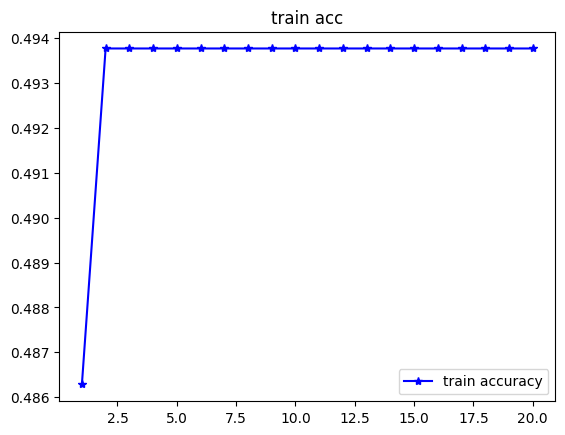

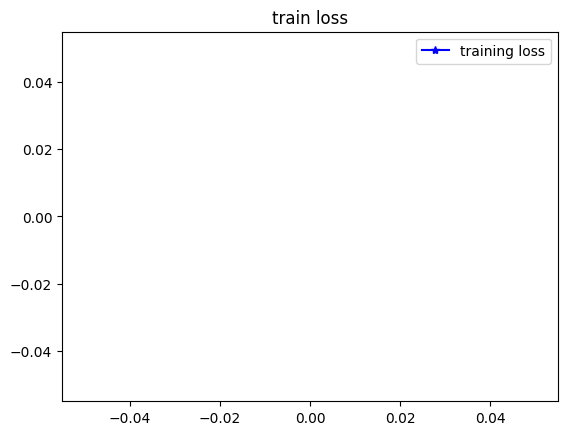

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b*-', label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b*-', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=2, steps = 25)
print('\ntest acc :\n', test_acc)

25/25 [==============================] - 0s 2ms/step - loss: nan - acc: 0.5000

test acc :
 0.5


## Matriz de confusión

In [ ]:
predictions = model.predict(X_test)
classes_x = predictions.T
classes_x = np.rint(classes_x)
classes_x

4/4 [==============================] - 0s 3ms/step


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [ ]:
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

mat = confusion_matrix(classes_x[0], y_test)

df = pd.DataFrame(mat, index=['Pred Original', 'Pred Plagio'], columns=['Label Original', 'Label Plagio'])

sns.heatmap(df, annot=True, cbar=None, cmap="Blues")
plt.title("Matriz de confusión"), plt.tight_layout()
plt.show()

ValueError: ignored